# Converting Luminosity to Fluence

In [1]:
import numpy as np

import os
import io
import tarfile

from snewpy.models import *
from snewpy.FlavorTransformation import *

In [2]:
model = Nakazato2013('../../models/Nakazato_2013/nakazato-LS220-BH-z0.004-s30.0.fits', NoTransformation)

In [59]:
MeV = 1e6 * 1.60218e-12
energy = np.linspace(0.1, 100, 501) * MeV 
luminosity = {}

for flavor in Flavor:
    lum = []
    for t in model.get_time():
        spectra = model.get_initialspectra(t, energy)
        lum.append(np.trapz(spectra[flavor], energy))
    luminosity[flavor] = lum

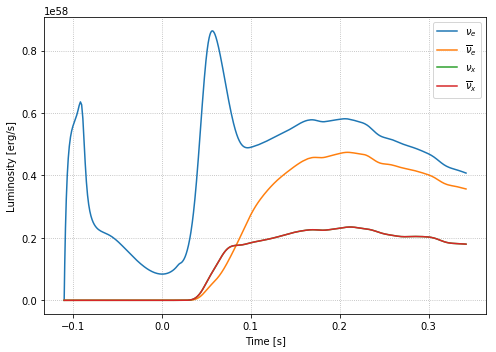

In [62]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
for k in luminosity:
    ax.plot(model.get_time(), luminosity[k], label = k.to_tex())
ax.set(xlabel = 'Time [s]',
       ylabel = 'Luminosity [erg/s]')
ax.grid(ls = ':')
ax.legend()
fig.tight_layout()

## Converting tarfile fluence to luminosity

In [63]:
sn = SNOwGLoBES('../../models/Nakazato_2013/nakazato-LS220-BH-z0.004-s30.0.SNOformat.tar.bz2')

In [64]:
d = 10. *1000.*3.086e+18       # luminosity to fluence
keV = 1e3 * 1.60218e-12        # eV to erg
MeV = 1e6 * 1.60218e-12
GeV = 1e9 * 1.60218e-12
dt = sn.time[-1]-sn.time[-2]
energy = np.linspace(0.1, 100, 501) * MeV 

luminosity = {}
for flavor in ['NuE', 'NuMu', 'NuTau', 'aNuE', 'aNuMu', 'aNuTau']:
    lum = []
    for time in sn.time:
        lum.append(np.trapz((sn.get_fluence(time)[flavor] * (4.*np.pi*d**2) / (dt * 0.2 * MeV)), energy))
    luminosity[flavor] = lum

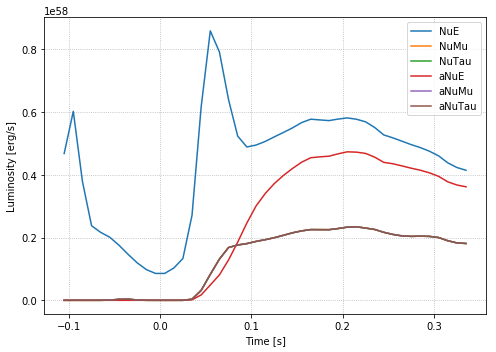

In [66]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
for flavor in ['NuE', 'NuMu', 'NuTau', 'aNuE', 'aNuMu', 'aNuTau']:
    ax.plot(sn.time, luminosity[flavor], label = flavor)
ax.set(xlabel = 'Time [s]',
       ylabel = 'Luminosity [erg/s]')
ax.legend()
ax.grid(ls = ':')
fig.tight_layout()